<center>
<b> <h1>Comprehensive Restaurant Analysis</h1></b>
</center>

<h3>1.0&nbsp;&nbsp;&nbsp;Overview of the Dataset :</h3>  

The dataset provides detailed information about various restaurants, encompassing the following attributes:

1. Restaurant ID: A unique identifier for each restaurant.
2. Restaurant Name: The name of the restaurant.
3. Country Code: The code representing the country where the restaurant is located.
4. City: The city where the restaurant is situated.
5. Address: The specific address of the restaurant.
6. Locality: The locality or neighborhood of the restaurant.
7. Locality Verbose: A detailed description of the locality.
8. Longitude: The longitude coordinate of the restaurant's location.
9. Latitude: The latitude coordinate of the restaurant's location.
10. Cuisines: The types of cuisine offered by the restaurant.
11. Currency: The currency used for pricing at the restaurant.
12. Has Table Booking: Indicates whether the restaurant offers table booking (Yes/No).
13. Has Online Delivery: Indicates whether the restaurant offers online delivery (Yes/No).
14. Is Delivering Now: Indicates if the restaurant is currently delivering (Yes/No).
15. Switch to Order Menu: Option to switch to the restaurant’s order menu (Yes/No).
16. Price Range: A numeric range representing the price level of the restaurant.
17. Aggregate Rating: The average rating of the restaurant.
18. Rating Color: A color code representing the rating category.
19. Rating Text: Descriptive text of the rating (e.g., Excellent, Good).
20. Votes: The number of votes the restaurant has received.

<h3>1.1&nbsp;&nbsp;&nbsp;Loading Dataset :</h3>  

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("E:\Internship\Data.csv")  
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


<center>
<b> <h2>1.2.&nbsp;&nbsp;&nbsp;Objective 1: Table Booking and Online Delivery</h2></b>
</center>

<h3>&nbsp;&nbsp;&nbsp;Step 1: Percentage of Restaurants Offering Table Booking and Online Delivery:</h3>  

In [16]:
# Calculate percentages
table_booking_percentage = df['Has Table booking'].value_counts(normalize=True) * 100
online_delivery_percentage = df['Has Online delivery'].value_counts(normalize=True) * 100

In [17]:
print('Table Booking Percentage:\n', table_booking_percentage)
print('Online Delivery Percentage:\n', online_delivery_percentage)

Table Booking Percentage:
 Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64
Online Delivery Percentage:
 Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


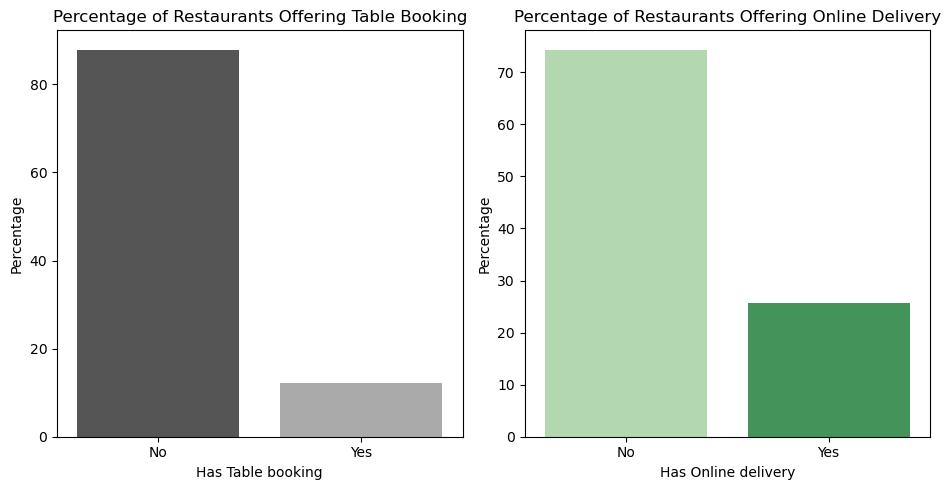

In [24]:
# Plot for Table Booking
plt.figure(figsize=(9.5, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=table_booking_percentage.index, y=table_booking_percentage.values, palette="gray")
plt.title('Percentage of Restaurants Offering Table Booking')
plt.ylabel('Percentage')

# Plot for Online Delivery
plt.subplot(1, 2, 2)
sns.barplot(x=online_delivery_percentage.index, y=online_delivery_percentage.values, palette="Greens")
plt.title('Percentage of Restaurants Offering Online Delivery')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()

<h3>&nbsp;&nbsp;&nbsp;Step 2: Compare the Average Ratings of Restaurants with Table Booking and Those Without:</h3>  

In [26]:
# Average ratings comparison
avg_rating_table_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()
print('Average Ratings:\n', avg_rating_table_booking)

Average Ratings:
 Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


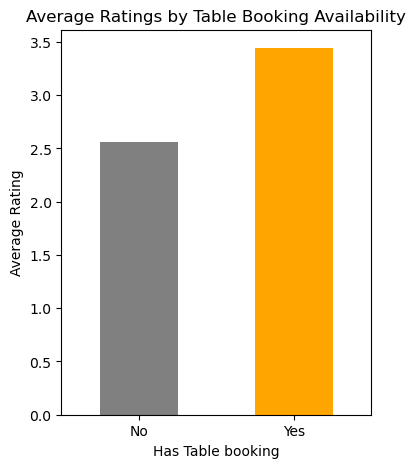

In [29]:
# Visualization of Average Ratings
plt.figure(figsize=(4, 5))
avg_rating_table_booking.plot(kind='bar', color=['gray', 'orange'])
plt.title('Average Ratings by Table Booking Availability')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

<h3>&nbsp;&nbsp;&nbsp;Step 3: Analyze the Availability of Online Delivery Among Restaurants with Different Price Ranges</h3>  

In [30]:
# Availability of online delivery in different price ranges
online_delivery_price_range = df.groupby(['Price range', 'Has Online delivery']).size().unstack().fillna(0)
print('Online Delivery by Price Range:\n', online_delivery_price_range)

Online Delivery by Price Range:
 Has Online delivery    No   Yes
Price range                    
1                    3743   701
2                    1827  1286
3                     997   411
4                     533    53


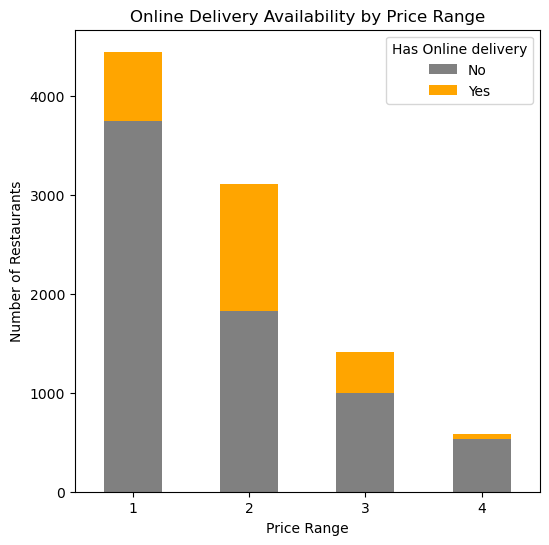

In [32]:
# Visualization of Online Delivery by Price Range
online_delivery_price_range.plot(kind='bar', stacked=True, color=['gray', 'orange'], figsize=(6, 6))
plt.title('Online Delivery Availability by Price Range')
plt.ylabel('Number of Restaurants')
plt.xlabel('Price Range')
plt.xticks(rotation=0)
plt.show()

<center>
<b> <h2>1.3&nbsp;&nbsp;Objective 2: Price Range Analysis</h2></b>
</center>

<h3>&nbsp;&nbsp;&nbsp;Step 1: Determine the Most Common Price Range Among All Restaurants</h3>  

In [33]:
# Find the most common price range
most_common_price_range = df['Price range'].mode()[0]
print(f"The most common price range is: {most_common_price_range}")

The most common price range is: 1


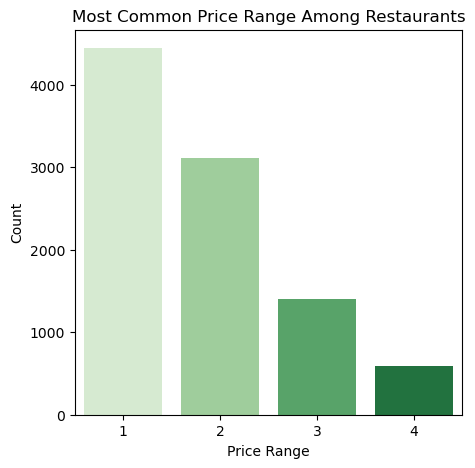

In [35]:
# Visualization of the most common price range
plt.figure(figsize=(5, 5))
sns.countplot(x='Price range', data=df, palette='Greens')
plt.title('Most Common Price Range Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

<h3>&nbsp;&nbsp;&nbsp;Step 2: Calculate the Average Rating for Each Price Range</h3>  

In [ ]:
# Calculate average rating for each price range
average_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()
print(average_rating_by_price_range)

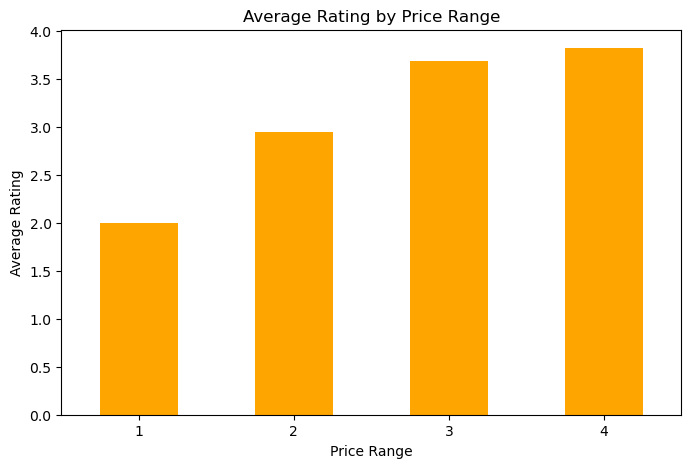

In [113]:
# Visualization of average rating by price range
plt.figure(figsize=(8, 5))
average_rating_by_price_range.plot(kind='bar', color='orange')
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

<center>
<b> <h2>1.4&nbsp;&nbsp;&nbsp;Objective 3: Feature Engineering Analysis</h2></b>
</center>

<h3>&nbsp;&nbsp;&nbsp;Step 1: Calculate the Length of Restaurant Name:</h3>  

In [114]:
# Extract length of the restaurant name
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)

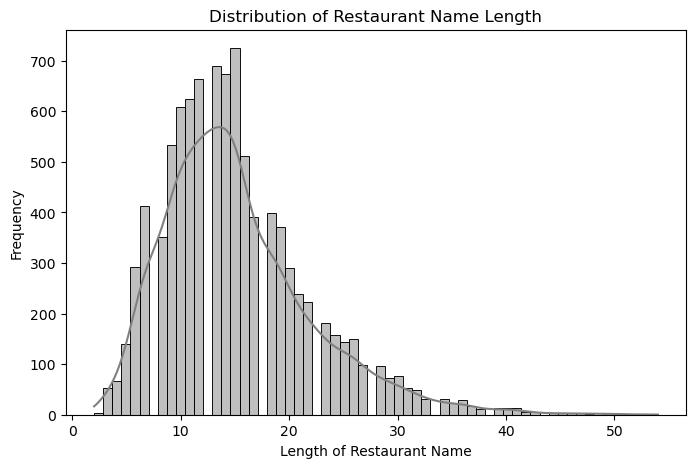

In [115]:
# Visualize the length of restaurant names
plt.figure(figsize=(8, 5))
sns.histplot(df['Restaurant Name Length'], kde=True, color='gray')
plt.title('Distribution of Restaurant Name Length')
plt.xlabel('Length of Restaurant Name')
plt.ylabel('Frequency')
plt.show()

<h3>&nbsp;&nbsp;&nbsp;Step 2: Calculate the Length of Address:</h3>  

In [116]:
# Extract length of the address
df['Address Length'] = df['Address'].apply(len)

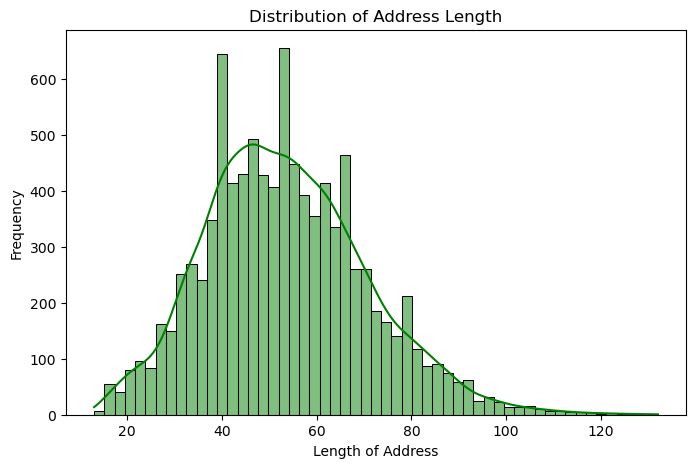

In [117]:
# Visualize the length of addresses
plt.figure(figsize=(8, 5))
sns.histplot(df['Address Length'], kde=True, color='green')
plt.title('Distribution of Address Length')
plt.xlabel('Length of Address')
plt.ylabel('Frequency')
plt.show()

<h3>&nbsp;&nbsp;&nbsp;Step 3: Encode Categorical Variables : "Has Table Booking"</h3>  

In [44]:
# Encode 'Has Table Booking'
df['Has Table Booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)

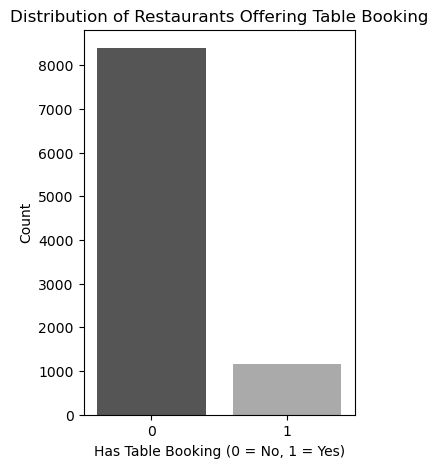

In [49]:
# Visualize the percentage of restaurants offering table booking 
plt.figure(figsize=(3.5, 5))
sns.countplot(x='Has Table Booking', data=df, palette='gray')
plt.title('Distribution of Restaurants Offering Table Booking')
plt.xlabel('Has Table Booking (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

<h3>&nbsp;&nbsp;&nbsp;Step 4: Encode Categorical Variables : "Has Online Delivery"</h3>      

In [51]:
# Encode 'Has Online Delivery'
df['Has Online Delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

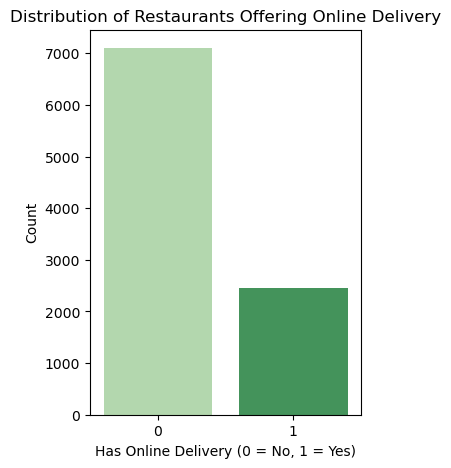

In [52]:
# Visualize the percentage of restaurants offering table booking and online delivery
plt.figure(figsize=(3.5, 5))
sns.countplot(x='Has Online Delivery', data=df, palette='Greens')
plt.title('Distribution of Restaurants Offering Online Delivery')
plt.xlabel('Has Online Delivery (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

<center>
<b> <h2>1.5&nbsp;&nbsp;&nbsp;Objective 4:Customer Preference Analysis</h2></b>
</center>

<h3>&nbsp;&nbsp;&nbsp;Step 1:Relationship Between Cuisine and Rating</h3>      

In [56]:
# Explode cuisines column to handle multiple cuisines in a single row
df['Cuisines'] = df['Cuisines'].str.split(', ')
exploded_data = df.explode('Cuisines')

# Calculate average rating per cuisine
cuisine_rating = exploded_data.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

print(cuisine_rating)

          Cuisines  Aggregate rating
0          Afghani          1.971429
1          African          3.525000
2         American          3.661538
3           Andhra          3.870000
4          Arabian          3.385714
..             ...               ...
140  Turkish Pizza          4.325000
141     Vegetarian          4.073913
142     Vietnamese          3.923810
143        Western          4.140000
144  World Cuisine          4.300000

[145 rows x 2 columns]


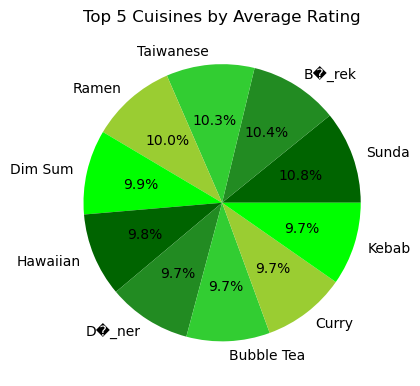

In [57]:
# Sort by average rating and select top 5 cuisines
top5_rating = cuisine_rating.sort_values(by='Aggregate rating', ascending=False).head(10)

# Define custom shades of green
green_shades = ['#006400', '#228B22', '#32CD32', '#9ACD32', '#00FF00']

# Plotting Pie Chart with custom shades of green
plt.figure(figsize=(11, 4.5))
plt.pie(top5_rating['Aggregate rating'], labels=top5_rating['Cuisines'], autopct='%1.1f%%', colors=green_shades[:len(top5_rating)])
plt.title('Top 5 Cuisines by Average Rating')
plt.show()

<h3>&nbsp;&nbsp;&nbsp;Step 2: Most Popular Cuisines Based on Votes</h3>      


In [59]:
# Calculate total votes per cuisine
cuisine_votes = exploded_data.groupby('Cuisines')['Votes'].sum().reset_index()

print(cuisine_votes)

          Cuisines   Votes
0          Afghani     811
1          African    5020
2         American  183117
3           Andhra    5946
4          Arabian    6150
..             ...     ...
140  Turkish Pizza     988
141     Vegetarian   10714
142     Vietnamese    5120
143        Western    4749
144  World Cuisine    1905

[145 rows x 2 columns]


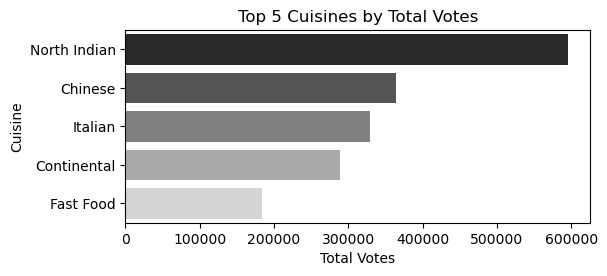

In [60]:
# Sort by votes and select top 5 cuisines
top5_votes = cuisine_votes.sort_values(by='Votes', ascending=False).head(5)

# Plotting Horizontal Bar Plot
plt.figure(figsize=(6, 2.5))
sns.barplot(x='Votes', y='Cuisines', data=top5_votes, palette='gray')
plt.title('Top 5 Cuisines by Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine')
plt.show()

<h3>&nbsp;&nbsp;&nbsp;Step 3: Identify Cuisines with Higher Ratings:</h3>      

In [61]:
# Merge average rating and votes data
merged_data = pd.merge(cuisine_rating, cuisine_votes, on='Cuisines')

# Sort by average rating to find highest rated cuisines
sorted_cuisines = merged_data.sort_values(by='Aggregate rating', ascending=False)

print(sorted_cuisines)

           Cuisines  Aggregate rating  Votes
130           Sunda          4.900000   5514
26           B�_rek          4.700000   1305
132       Taiwanese          4.650000    384
112           Ramen          4.500000   1259
43          Dim Sum          4.466667   1755
..              ...               ...    ...
94         Moroccan          1.620000    477
11           Awadhi          1.572727    732
6          Armenian          1.300000    166
90          Mineira          0.000000      2
39   Cuisine Varies          0.000000      2

[145 rows x 3 columns]


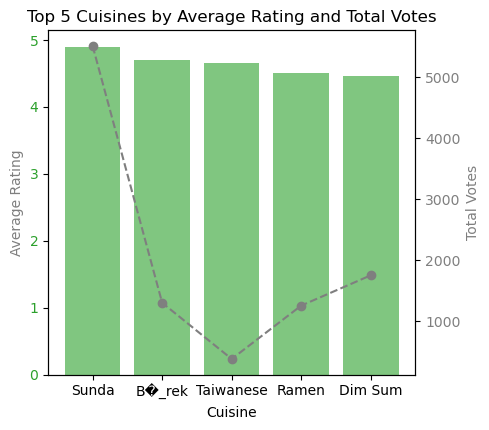

In [62]:
# Select top 5 cuisines
top5_cuisines = sorted_cuisines.head(5)

# Plotting Dual Axis Plot for Top 5 Cuisines
fig, ax1 = plt.subplots(figsize=(5, 4.4))

# Plot average rating on the primary y-axis
ax1.set_xlabel('Cuisine')
ax1.set_ylabel('Average Rating', color='tab:gray')
ax1.bar(top5_cuisines['Cuisines'], top5_cuisines['Aggregate rating'], color='tab:green', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='tab:green')

# Create a secondary y-axis for total votes
ax2 = ax1.twinx()
ax2.set_ylabel('Total Votes', color='tab:gray')
ax2.plot(top5_cuisines['Cuisines'], top5_cuisines['Votes'], color='tab:gray', marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:gray')

# Add titles and show plot
plt.title('Top 5 Cuisines by Average Rating and Total Votes')
fig.tight_layout()
plt.show()